##  Quantum Phase Estimation

Quantum Phase Estimation (QPE) is a crucial algorithm in quantum computing with wide-ranging applications in chemistry, cryptography, and beyond. It allows us to estimate the phase (or eigenvalue) of an eigenvector of a unitary operator. 

QPE is the backbone of many quantum algorithms, such as Shor's algorithm for factoring and algorithms for solving linear systems.

Below is a step-by-step implementation of the Quantum Phase Estimation algorithm using IBM's Qiskit.

In this example, we perform the following steps:

✅ Unitary Definition: We define a unitary operation UUU with a known eigenvalue. Here, we use a phase gate with a phase shift of θ=1/8

✅ Quantum Circuit Creation: We create a quantum circuit with nnn counting qubits and 1 additional qubit for the unitary operation.

✅ Hadamard Gates: We apply Hadamard gates to the counting qubits to create a superposition of states.

✅ Controlled-U Gates: We apply controlled-U gates, which apply the unitary operation conditionally on the state of each counting qubit.

✅ Inverse Quantum Fourier Transform (QFT): We apply the inverse QFT to the counting qubits to extract the phase information.

✅ Measurement: We measure the counting qubits to get the result.

✅ Visualization: We visualize the circuit and the measurement results using Qiskit's plotting tools.

In [19]:
# Import necessary libraries
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [20]:
# Define the unitary operation (in this case, we use a simple gate U)
theta = 1/8
U = QuantumCircuit(1)
U.p(2 * np.pi * theta, 0)  # U is the phase gate

In [21]:
# Number of qubits for the QPE
n = 3  # Number of counting qubits

# Create the quantum phase estimation circuit
qc = QuantumCircuit(n + 1, n)

In [22]:
# Apply Hadamard gates to the counting qubits
for qubit in range(n):
    qc.h(qubit)

In [23]:
# Apply controlled-U gates
for qubit in range(n):
    qc.append(U.to_gate().control(1), [qubit, n])

In [24]:
# Apply inverse QFT to the counting qubits
def qft_dagger(circuit, n):
    """Apply the inverse QFT on the first n qubits in the circuit"""
    for qubit in range(n//2):
        circuit.swap(qubit, n-1-qubit)
    for j in range(n):
        for m in range(j):
            circuit.cp(-np.pi/float(2**(j-m)), m, j)
        circuit.h(j)

qft_dagger(qc, n)

In [25]:
# Measure the counting qubits
qc.measure(range(n), range(n))

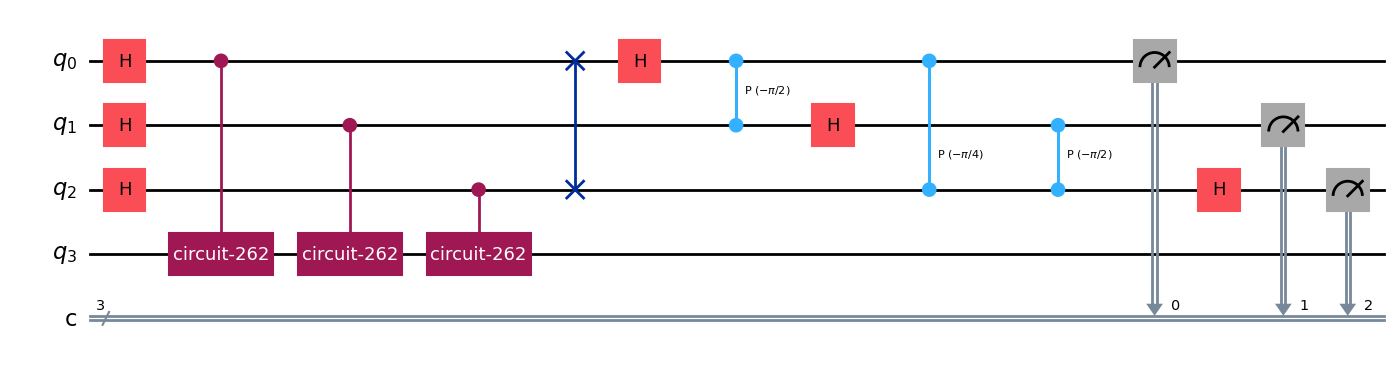

In [26]:
# Draw the circuit
qc.draw('mpl')
plt.show()

In [27]:
# Simulate the circuit
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)

In [28]:
# Execute the circuit on the simulator
result = simulator.run(compiled_circuit).result()

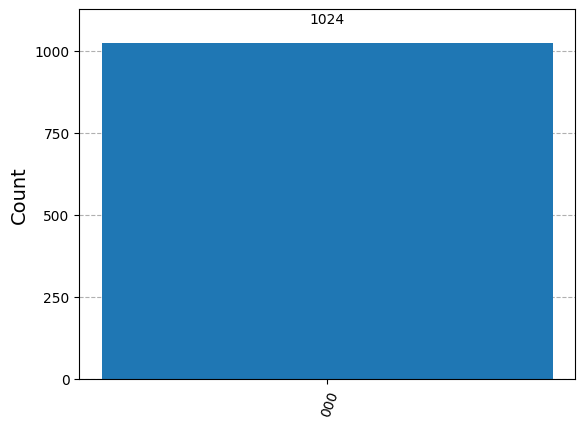

In [29]:
# Get and plot the counts
counts = result.get_counts(qc)
plot_histogram(counts)
plt.show()

Quantum Phase Estimation is a powerful algorithm that forms the basis of many quantum applications. Understanding and implementing QPE can provide deep insights into the potential of quantum computing.